In [1]:
!pip install wordcloud
!pip install eli5

In [2]:
# lets now import all the required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize, regexp_tokenize

import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

#for any kind of bugs
nltk.download('stopwords')
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer

import eli5
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import joblib

[nltk_data] Downloading package wordnet to C:\Users\Visual
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Visual
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Visual
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
test_df = pd.read_csv(r"C:\Users\Visual singh\OneDrive\punit\Internship With Flip Robo\1842\10-51022\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv")
train_df = pd.read_csv(r"C:\Users\Visual singh\OneDrive\punit\Internship With Flip Robo\1842\10-51022\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")

In [4]:
df = train_df.copy()

df['original_length'] = df.comment_text.str.len()

In [5]:
# converting comment text to lowercase format
df['comment_text'] = df.comment_text.str.lower()
df.head()

# Removing and Replacing unwanted characters in the comment_text column

# Replacing '\n' with ' '
df.comment_text = df.comment_text.str.replace('\n',' ')

# Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc
df.comment_text = df.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

# Removing Stop Words and Punctuations

# Getting the list of stop words of english language as set
stop_words = set(stopwords.words('english'))

# Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
# Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

# Checking the new list of stop words
print("New list of custom stop words are as follows:\n\n")
print(stop_words)

# Removing stop words
df.comment_text = df.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

# Removing punctuations
df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")
# Stemming words
snb_stem = SnowballStemmer('english')
df.comment_text = df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

New list of custom stop words are as follows:


{'to', 'yourself', 'smh', 'very', 'this', 'have', 'but', 'further', "isn't", 'be', 'few', 'lol', 'until', 'during', 'why', 'an', 'above', 'whom', 're', "didn't", 'here', "it's", "i'll", "needn't", 'your', 'into', 'him', 'been', 'all', "doesn't", "she's", 'ok', "mightn't", 'umm', 'herself', 'having', 'after', 'and', "wasn't", "should've", 'our', 'down', 'some', 'was', 'd', "i've", "aren't", 'if', 'only', 'himself', "wouldn't", 'h', "won't", 'once', 'just', "mustn't", 'that', 'y', 'me', 'had', 'o', "there's", 'nt', 'at', 'hasn', 'l', 'doing', 'also', 'those', 'f', 'p', "hasn't", 'lmfao', "d'aww", 'own', 't', 'mightn', 'hi', 'his', 'does', 'for', 'aren', 'u', 'couldn', 'itself', "you've", 'so', 'ain', "he's", 'hey', 'ilu', 'us', "haven't", 'oh', 'the', 'each', 'yolo', 'there', 'll', "you'd", 'yours', 'shouldn', 'hmm', 'by', 'them', 'v', 'up', 'where', 'yourselves', 'wasn', 'n', 'nor', 's', 'wouldn', 'q', "shouldn't", "that'll", 'same', 'what

C:\Users\Visual singh\AppData\Local\Temp\ipykernel_23884\3679429251.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")


In [6]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [7]:
train_df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [9]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
test_df.isnull().sum()

id              0
comment_text    0
dtype: int64

In [11]:
train_df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


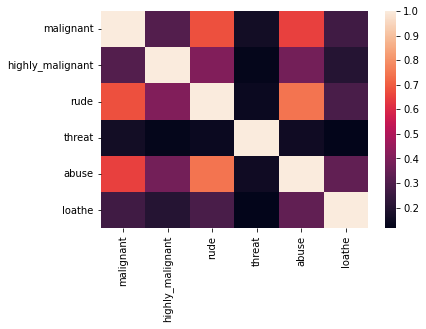

In [12]:
print(train_df.corr())
print(sns.heatmap(train_df.corr()))

In [13]:
train_df.skew()

C:\Users\Visual singh\AppData\Local\Temp\ipykernel_23884\2566899487.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.skew()


malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant
0    144277
1     15294
Name: malignant, dtype: int64


C:\Users\Visual singh\anaconda3\anaconda file\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


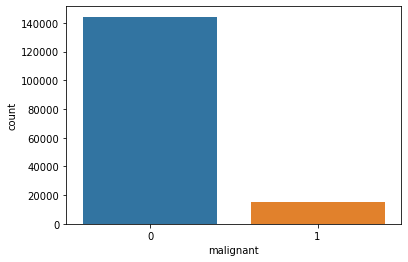

C:\Users\Visual singh\anaconda3\anaconda file\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


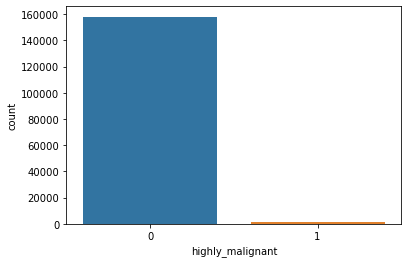

loathe
0    158166
1      1405
Name: loathe, dtype: int64


C:\Users\Visual singh\anaconda3\anaconda file\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


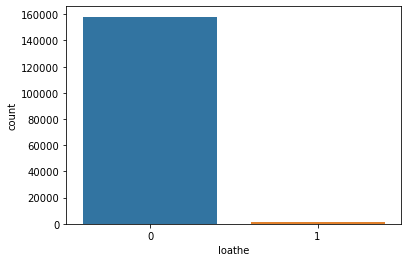

rude
0    151122
1      8449
Name: rude, dtype: int64


C:\Users\Visual singh\anaconda3\anaconda file\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


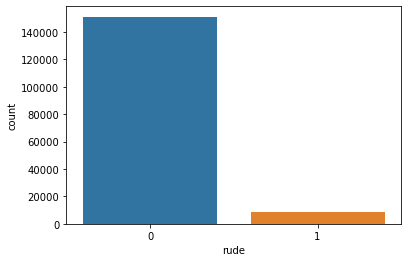

C:\Users\Visual singh\anaconda3\anaconda file\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


abuse
0    151694
1      7877
Name: abuse, dtype: int64


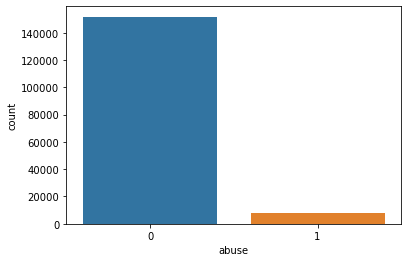

C:\Users\Visual singh\anaconda3\anaconda file\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


threat
0    159093
1       478
Name: threat, dtype: int64


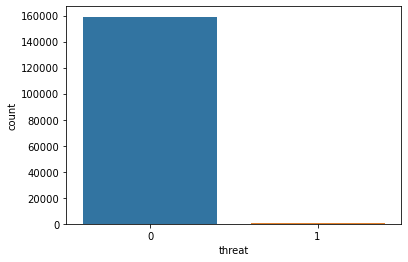

In [14]:
col = ['malignant', 'highly_malignant', 'loathe', 'rude', 'abuse', 'threat']
for i in col:
    print(i)
    print(train_df[i].value_counts())
    sns.countplot(train_df[i])
    plt.show()

In [15]:
# Replace email addresses with 'email'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')
# Remove punctuation
train_df['comment_text'] = train_df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\s+|\s+?$', '')

C:\Users\Visual singh\AppData\Local\Temp\ipykernel_23884\2705249357.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
C:\Users\Visual singh\AppData\Local\Temp\ipykernel_23884\2705249357.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
C:\Users\Visual singh\AppData\Local\Temp\ipykernel_23884\2705249357.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$', 'dollers')
C:\Users\Visual singh\AppData\Local\Temp\ipykernel_23884\2705249357.py:11: FutureWarning: The default value of regex will change from True to False in a future version.


In [16]:
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\s+/\s+?$' , '')

C:\Users\Visual singh\AppData\Local\Temp\ipykernel_23884\2135906341.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\s+/\s+?$' , '')


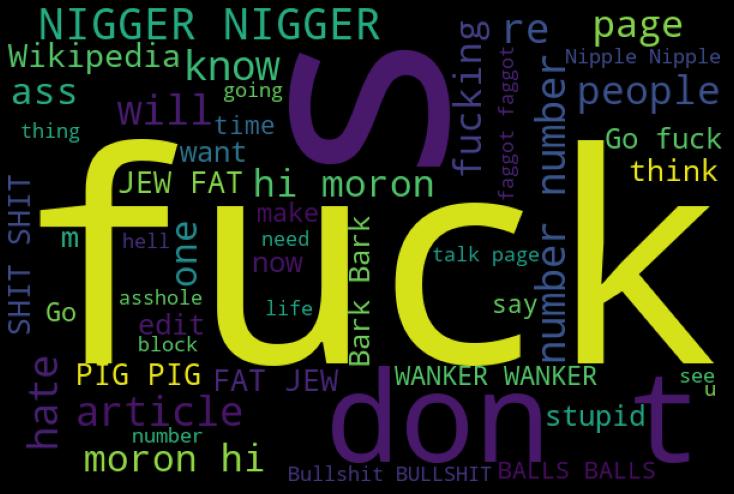

In [17]:
hams = train_df['comment_text'][train_df['malignant']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

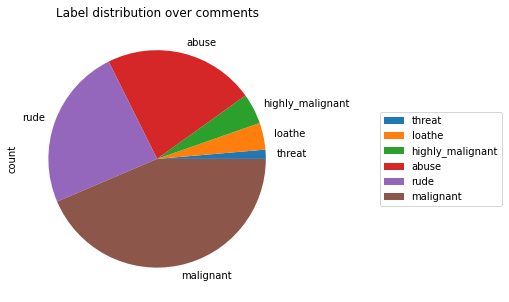

In [18]:
df_distribution = train_df[col].sum()\
                          .to_frame()\
                          .rename(columns={0: 'count'})\
                          .sort_values('count')
df_distribution.plot.pie(y = 'count', 
                         title = 'Label distribution over comments', 
                         figsize=(5,5))\
.legend(loc = 'center left', bbox_to_anchor = (1.3, 0.5))

In [19]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [20]:
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(t) for t in x.split()))

test_df['comment_text'] = test_df['comment_text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(t) for t in x.split()))

train_df['clear_length'] = train_df.comment_text.str.len()

train_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clear_length
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,261
1,000103f0d9cfb60f,D aww He match this background colour I m seem...,0,0,0,0,0,0,114
2,000113f07ec002fd,Hey man I m really not trying to edit war It s...,0,0,0,0,0,0,229
3,0001b41b1c6bb37e,More I can t make any real suggestion on impro...,0,0,0,0,0,0,591
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0,63


In [21]:
for i in range(len(test_df['comment_text'])):
    test_df['comment_text'][i] = test_df['comment_text'][i].lower()
    j = []
    for word in test_df['comment_text'][i].split():
        j.append(lemmatizer.lemmatize(word, pos="v"))
        test_df['comment_text'][i] = "".join(j)

In [22]:
x = train_df.drop(['malignant'],axis=1)
y = train_df['malignant']

In [23]:
naive = MultinomialNB()

In [24]:
tf_vec = TfidfVectorizer()

In [25]:
comment = train_df['comment_text']

In [26]:
x = tf_vec.fit_transform(comment)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)
naive.fit(x_train,y_train)

MultinomialNB()

In [28]:
y_pred = naive.predict(x_test)

In [29]:
joblib.dump(y_pred, "model")

['model']

In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)